In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import argparse
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

train_file = open('train.data')
test_file = open('test.data')

epochs = 10
steps = 150

d_train = []
d_label = []
train_file.seek(0)
for line in train_file:
    line = line.rstrip('\n')
    lc = line.split(', ')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_train.append(line_l)
    if (lc[14] == '<=50K'):
        d_label.append(-1)
    else:
        d_label.append(1)
d_train = preprocessing.scale(d_train)
d_train = np.c_[d_train, d_label]
    
d_test = []
test_file.seek(0)
for line in test_file:
    line = line.rstrip('\n')
    lc = line.split(',')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_test.append(line_l)
d_test = preprocessing.scale(d_test)

d_train = np.array(d_train, dtype = float)
d_test = np.array(d_test, dtype = float)

print(d_train.shape)

(43958, 7)


Start training... Alpha = 0.5000
Training epoch 0 ...
Training epoch 1 ...
Training epoch 2 ...
Training epoch 3 ...
Training epoch 4 ...
Training epoch 5 ...
Training epoch 6 ...
Training epoch 7 ...
Training epoch 8 ...
Training epoch 9 ...


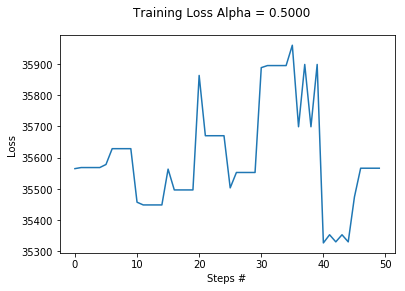

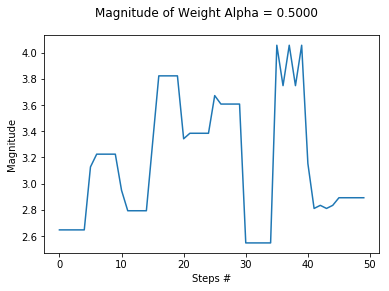

Start training... Alpha = 0.1000
Training epoch 0 ...
Training epoch 1 ...
Training epoch 2 ...
Training epoch 3 ...
Training epoch 4 ...
Training epoch 5 ...
Training epoch 6 ...
Training epoch 7 ...
Training epoch 8 ...
Training epoch 9 ...


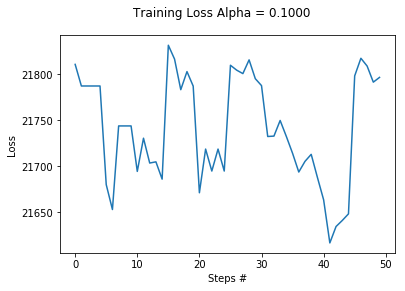

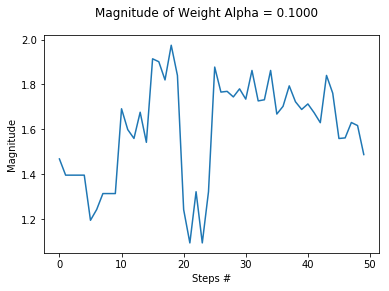

In [5]:
# lrs = [0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001]
lrs = [0.5, 0.1]
lam = 0.01
weights = []
bias = 1

for miu in lrs:
    print('Start training... Alpha = %.4f' % miu)
    
    weight = np.random.uniform(size = len(d_train[0]) - 1)
    
    epoch_loss_hist = []
    step_loss_hist = []
    mag_hist = []
    epoch_count = 0
    for epoch in range(epochs):
        print('Training epoch', epoch, '...')
#         if (epoch%10 == 0):
#             curr_mag = la.norm(weight)
#             if (epoch > 30 and (curr_mag - prev_mag) < 0.001):
#                 break
#             prev_mag = curr_mag
        np.random.shuffle(d_train)
        e_train = d_train[50:, :]
        e_val = d_train[0:50, :]
        
        epoch_loss = []
        for step in range(steps):
            step_loss = 0
            for row in e_train:
                pred = weight.dot(row[0:6]) + bias
                loss = max(0, 1 - row[6]*pred)
                step_loss += loss
                if (row[6]*pred >= 1):
                    weight = (1 - miu*lam)*weight
                else:
                    weight = (1 - miu*lam)*weight + miu*row[6]*row[0:6]
                    bias = bias + miu*row[6]
            if (step%30 == 0):
                epoch_loss.append(step_loss)
                step_loss_hist.append(step_loss)
                mag_hist.append(la.norm(weight, 2))
        if (epoch%10 == 1):
            epoch_loss_hist.append(np.mean(epoch_loss))
        epoch_count += 1
    
#     fig = plt.figure()
#     plt.plot(np.arange(0, epoch_count), epoch_loss_hist)
#     fig.suptitle('Training Loss Alpha = %.4f' % miu)
#     plt.xlabel("Epoch #")
#     plt.ylabel("Loss")
#     plt.show()
    fig = plt.figure()
    plt.plot(np.arange(0, len(step_loss_hist)), step_loss_hist)
    fig.suptitle('Training Loss Alpha = %.4f' % miu)
    plt.xlabel("Steps #")
    plt.ylabel("Loss")
    plt.show()
    fig = plt.figure()
    plt.plot(np.arange(0, len(mag_hist)), mag_hist)
    fig.suptitle('Magnitude of Weight Alpha = %.4f' % miu)
    plt.xlabel("Steps #")
    plt.ylabel("Magnitude")
    plt.show()
    


In [ ]:
preds_test = activation(d_test.dot(weights[0]))
print(preds_test)

In [ ]:
import csv
res = [['Example', 'Label']]
ct = 0
with open('weight3.txt', 'w') as f_weight:
    for item in weights:
        f_weight.write("%s\n" % item)
for lb in preds_test:
    row = []
    row.append("'%s'" %ct)
    if (lb < 0):
        row.append('<=50K')
    else:
        row.append('>50K')
    res.append(row)
    ct += 1
with open("output3.csv",'w', newline='') as resultFile:
    wr = csv.writer(resultFile)
    wr.writerows(res)